# ML05

### Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset.
### Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [1]:
import numpy as np, pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
378,4,156,75,0,0,48.3,0.238,32,1
536,0,105,90,0,0,29.6,0.197,46,0
481,0,123,88,37,0,35.2,0.197,29,0
449,0,120,74,18,63,30.5,0.285,26,0
603,7,150,78,29,126,35.2,0.692,54,1


In [4]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [10]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']]
y = df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

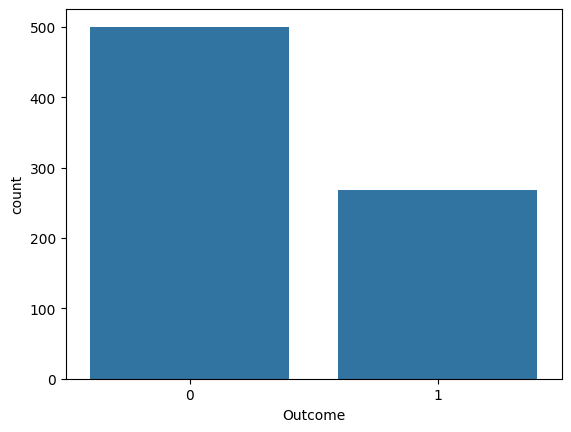

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
sns.countplot(x=y)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [17]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = KNN.predict(x_test)

In [19]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report
)

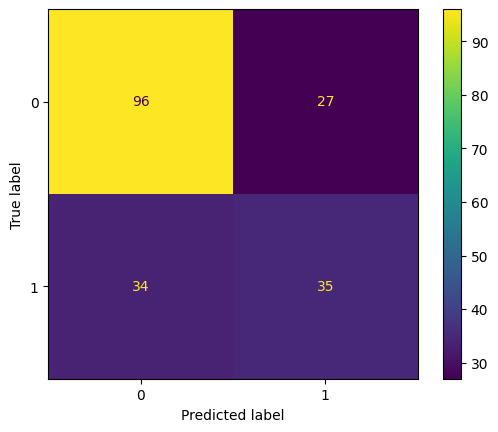

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       123
           1       0.56      0.51      0.53        69

    accuracy                           0.68       192
   macro avg       0.65      0.64      0.65       192
weighted avg       0.68      0.68      0.68       192



In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6822916666666666


In [34]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k);
    knn.fit(x_train, y_train)
    y_p = knn.predict(x_test)
    error.append(np.mean(y_p != y_test))

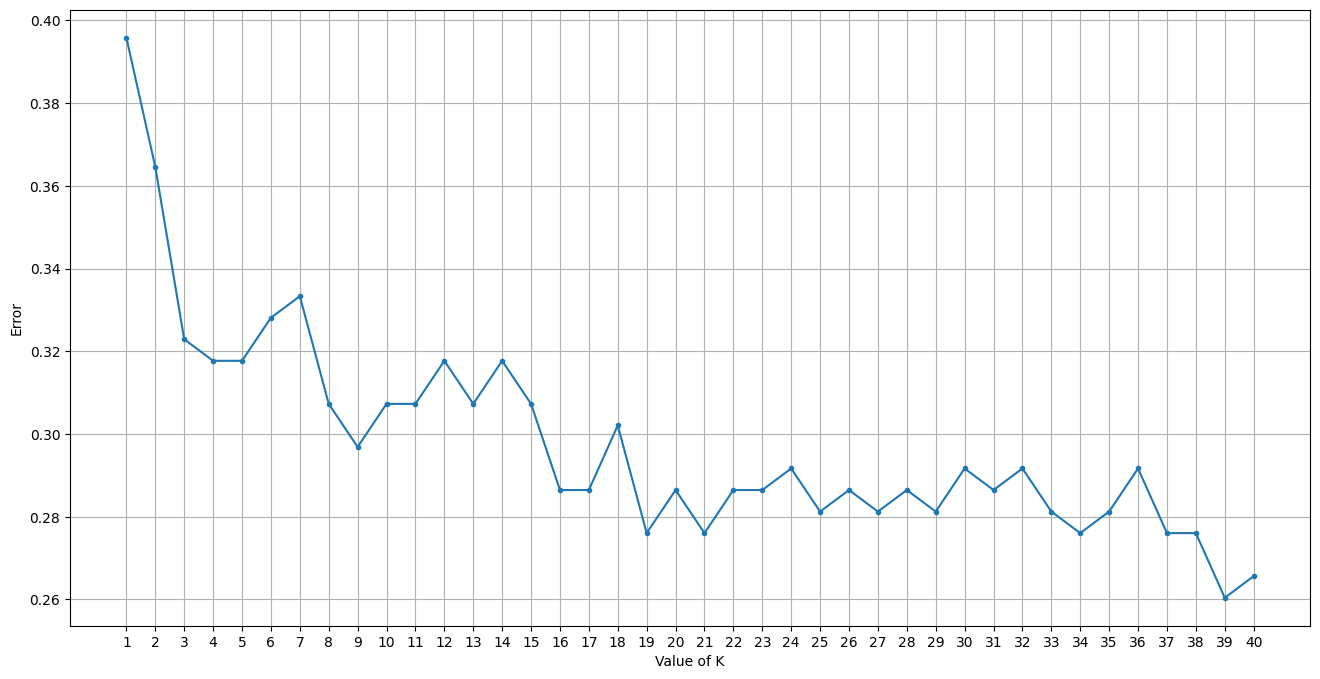

In [38]:
plt.figure(figsize=(16,8))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41), error, marker='.')

Here’s a concise overview of the K-Nearest Neighbors (KNN) classifier:

### K-Nearest Neighbors (KNN) Classifier Overview

- **Definition**: KNN is a simple, intuitive, and widely used supervised machine learning algorithm for classification and regression tasks.

- **How It Works**:
  - **Instance-Based Learning**: KNN stores all available cases and classifies new cases based on a similarity measure (e.g., distance).
  - **Distance Metrics**: Common metrics include:
    - **Euclidean Distance**: The straight-line distance between two points.
    - **Manhattan Distance**: The distance measured along axes at right angles (grid-like path).
    - **Minkowski Distance**: Generalization of both Euclidean and Manhattan distances.
  
- **Classification Process**:
  1. **Choose K**: Decide on the number of neighbors (K) to consider.
  2. **Calculate Distances**: Compute the distance from the new instance to all training instances.
  3. **Find Neighbors**: Identify the K training instances closest to the new instance.
  4. **Voting**: 
     - For classification, the class label is determined by majority voting among the K neighbors.
     - For regression, the prediction is the average (or weighted average) of the neighbors’ values.

### Key Characteristics
- **Non-Parametric**: KNN makes no assumptions about the underlying data distribution.
- **Lazy Learning**: The model is not built during the training phase; all computations are deferred until a query is made.
- **Scalability**: Performance can decrease with high-dimensional data due to the curse of dimensionality.
- **Sensitivity**: KNN is sensitive to irrelevant features and the scale of the data; hence, feature scaling (e.g., normalization or standardization) is crucial.

### Advantages
- **Simplicity**: Easy to implement and understand.
- **Adaptability**: Effective for various data distributions and applications.
- **No Training Phase**: Directly uses the training data for predictions.

### Disadvantages
- **Computationally Expensive**: The need to calculate distances for each query can be slow, especially for large datasets.
- **Memory Intensive**: Requires storing the entire training dataset in memory.
- **Sensitivity to Noise**: Outliers can significantly affect the classification outcome.
- **Curse of Dimensionality**: Performance can degrade as the number of features increases, making distance measures less meaningful.

### Use Cases
- **Applications**: KNN is commonly used in various fields, including:
  - Medical diagnostics (e.g., disease prediction)
  - Image recognition (e.g., classifying images based on visual similarity)
  - Recommendation systems (e.g., recommending products based on user behavior)

### Conclusion
The KNN classifier is a powerful and versatile tool for classification tasks, particularly when simplicity and interpretability are priorities. Proper feature selection and scaling are essential to maximizing its effectiveness.